# Support Vector Machines (SVM)
## Regresión SVM

La prueba de "desmoronamiento" de concreto (concrete slump), mide la consistencia del  concreto fresco anntes de "cuajar".  Se realiza para verificar la fácilidad de uso del concreto recién preparado (la facilidad con que fluye). También se puede utilizar como un indicador de una tanda incorrectamente mezclada.

<img src="Types_of_concrete_slump.jpg">

El conjunto de datos consiste en varias propiedades del cemento y el resultado de las métricas de prueba del desmoronamiento en cm. Posteriormente (28 días más tarde) el concreto ya "cuajado" se prueba para ver su resistencia a la compresión.

Variables de entrada (7)(kg de componente en un M^3 de concreto):
* Cemento
* Desecho (Slag)
* Ceniza volante (Fly ash)
* Agua
* SP (Superplasticizer)
* Piedrín (Coarse Aggr.)
* Arena (Fine Aggr.)

Variables de salida (3):
* Desmoronamiento (SLUMP) (cm)
* Flujo (FLOW) (cm)
* **Resistencia compresión 28 días (28-day Compressive Strength) (Mpa)**

Fuente de datos: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Crédito: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv('cement_slump.csv')

In [3]:
datos.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
datos.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:>

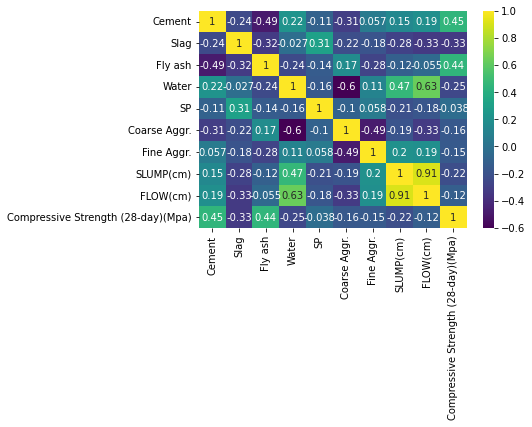

In [5]:
sns.heatmap(datos.corr(),cmap = 'viridis', annot = True)

## División Entenamiento/Prueba

In [6]:
X = datos.drop('Compressive Strength (28-day)(Mpa)', axis = 1)
y = datos['Compressive Strength (28-day)(Mpa)']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.3, 
                                                            random_state = 101)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
normalizador = StandardScaler()

In [11]:
X_entreno_norm = normalizador.fit_transform(X_entreno)
X_prueba_norm = normalizador.transform(X_prueba)

## Regresión SVM

Hay tres implementaciones de regresión con SVM ó SVR: SVR, NuSVR y LinearSVR. LinearSVR provee una implementación más rápida que SVR, pero solo considera el kernel lineal.  El NuSVR implementa una formulación algo diferente a SVR y LinearSVR. Ver [Detalles de implementación](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) para más detalles.

In [12]:
from sklearn.svm import SVR, LinearSVR

Parámetro C: C es 1 por default y es una selección por default razonable.  Si se tienen muchas observaciones ruidosas, habrá que reducirla: disminuir el valor de C corresponde a mayor regularización.

LinearSVC y LinearSVR son menos sensitivos a C para valores grandes, y los resultados de las predicciones dejan de mejorar luego de un cierto punto crítico (threshold).  Mientras tanto, el uso de valores mayores de C tomarán más tiempo para entrenar el modelo, hasta 10 veces más.

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

In [13]:
modelo_base = SVR()  #Con todos los parámetros en default

In [14]:
modelo_base.fit(X_entreno_norm,y_entreno)

SVR()

In [15]:
base_predicciones = modelo_base.predict(X_prueba_norm)

## Evaluación

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
mean_absolute_error(y_prueba, base_predicciones)

5.236902091259178

In [18]:
np.sqrt(mean_squared_error(y_prueba, base_predicciones))

6.695914838327133

In [19]:
y_prueba.mean()

36.26870967741935

## Búsqueda por malla (Grid Search) para intentar obtener un mejor modelo

In [20]:
malla_parametros = {'C':[0.001, 0.01, 0.1, 0.5, 1],
             'kernel':['linear', 'rbf', 'poly'],
              'gamma':['scale', 'auto'],
              'degree':[2, 3, 4],
              'epsilon':[0, 0.01, 0.1, 0.5, 1, 2]}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
svr = SVR()
malla = GridSearchCV(svr,param_grid = malla_parametros)

In [23]:
malla.fit(X_entreno_norm, y_entreno)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [24]:
malla.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [25]:
malla_predicciones = malla.predict(X_prueba_norm)

In [26]:
mean_absolute_error(y_prueba, malla_predicciones)

2.5128012210762365

In [27]:
np.sqrt(mean_squared_error(y_prueba, malla_predicciones))

3.178210305119858

Una gran mejora!